In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

Mounted at /content/gdrive


In [4]:
cd gdrive/My Drive/Colab Notebooks/Hate Speech Detection

/content/gdrive/My Drive/Colab Notebooks/Hate Speech Detection


In [ ]:
ls

'Hate Speech Detection-Copy1.ipynb'   test.csv   train.csv


In [ ]:
dataset = pd.read_csv('train.csv')

In [ ]:
dataset.describe()

,id,speech,label
count,5852,5852,5852
unique,5852,5828,4
top,hasoc_en_4263,By wearing the #BalidaanBadge over his gloves ...,NONE
freq,1,5,3591


In [ ]:
dataset.groupby('label').describe()

id                            speech         \
      count unique            top freq  count unique   
label                                                  
HATE   1143   1143  hasoc_en_4263    1   1143   1141   
NONE   3591   3591  hasoc_en_5820    1   3591   3578   
OFFN    451    451  hasoc_en_5514    1    451    451   
PRFN    667    667  hasoc_en_4433    1    667    667   

                                                               
                                                     top freq  
label                                                          
HATE   #ShameOnICC @ECB_cricket hahaha I pity on your...    2  
NONE   By wearing the #BalidaanBadge over his gloves ...    5  
OFFN   @kathygriffin     #fucktrump     Game on! Yup ...    1  
PRFN   So.... when it happens to @realDonaldTrump its...    1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002412F29FE08>,
      dtype=object)

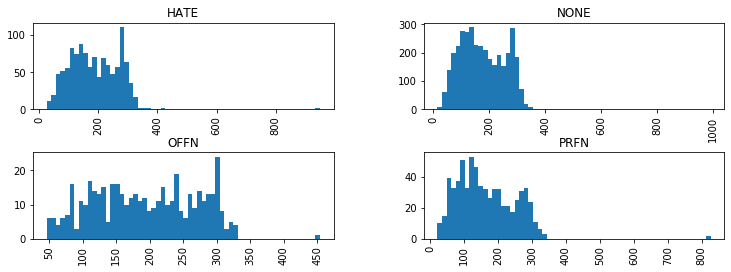

In [ ]:
dataset.hist(column = 'length', by = 'label', bins = 60, figsize = (12,4))

In [ ]:
import string

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def text_process(speech):
    no_punctuation = [c for c in speech if c not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [lemmatizer.lemmatize(word) for word in no_punctuation.split() if word.lower() not in set(stopwords.words('english'))]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = pd.get_dummies(dataset['label'])

In [ ]:
y

,HATE,NONE,OFFN,PRFN
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
5847,0,0,0,1
5848,0,1,0,0
5849,0,0,1,0
5850,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['speech'], dataset['label'], test_size=0.20, random_state=42)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
pipeline = Pipeline([
    ('bow_transformer',CountVectorizer(analyzer = text_process)),
    ('tfidftransformer', TfidfTransformer()),
    ('classifier',LogisticRegression(multi_class='ovr'))
])

In [ ]:
tfidftransformer.shape

NameError: ignored

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow_transformer',
                 CountVectorizer(analyzer=<function text_process at 0x7f93a51580d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\...
                ('tfidftransformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                 

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
predictions = pipeline.predict(X_test)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

        HATE       0.01      0.20      0.03        15
        NONE       0.98      0.64      0.77      1132
        OFFN       0.00      0.00      0.00         0
        PRFN       0.14      0.75      0.23        24

    accuracy                           0.63      1171
   macro avg       0.28      0.40      0.26      1171
weighted avg       0.95      0.63      0.75      1171



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(predictions, y_test))

[[  2   1   4   1]
 [209 709  84  93]
 [  0   0   0   0]
 [  1  24   4  39]]


In [ ]:
predictions = pipeline.predict(test_data['speech'])

In [ ]:
bow_transformer1 = CountVectorizer(analyzer= text_process).fit(test_data['speech'])

In [ ]:
speeches_bow1 = bow_transformer.transform(test_data['speech'])

In [ ]:
tfidftransformer1 = TfidfTransformer().fit(speeches_bow1)

In [ ]:
speeches_tfidf1 = tfidftransformer.transform(speeches_bow1)

In [ ]:
speeches_tfidf1 = speeches_tfidf1.toarray()

In [ ]:
predictions = model.predict(speeches_tfidf1)

In [ ]:
pred = np.argmax(predictions, axis = 1)

In [ ]:
print(pred)

[1 1 1 ... 1 1 1]


In [ ]:
x1 = pd.DataFrame(test_data['id'], columns=['id'])

In [ ]:
y1 = pd.DataFrame(pred,columns=['label'])

In [ ]:
new_dataframe = pd.concat([x1, y1], axis = 1)

In [ ]:
new_list = list(new_dataframe['label'])
i = 0
for each in new_list:
  if each == 0:
    new_dataframe['label'][i] = 'HATE'
  elif each == 1:
    new_dataframe['label'][i] = 'NONE'
  elif each == 2:
    new_dataframe['label'][i] = 'OFFN'
  elif each == 3:
    new_dataframe['label'][i] = 'PRFN'
  i = i + 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
new_dataframe

,id,label
0,hasoc_en_902,NONE
1,hasoc_en_416,NONE
2,hasoc_en_207,NONE
3,hasoc_en_595,NONE
4,hasoc_en_568,PRFN
...,...,...
1148,hasoc_en1_3958,NONE
1149,hasoc_en1_4648,HATE
1150,hasoc_en1_4832,NONE
1151,hasoc_en1_3721,NONE


In [ ]:
np.savetxt(r'predict.txt', new_dataframe.values, fmt='%s', delimiter='\t')

In [ ]:
bow_transformer = CountVectorizer(analyzer= text_process).fit(dataset['speech'])

In [ ]:
speeches_bow = bow_transformer.transform(dataset['speech'])

In [ ]:
tfidftransformer = TfidfTransformer().fit(speeches_bow)

In [ ]:
speeches_tfidf = tfidftransformer.transform(speeches_bow)

In [ ]:
speeches_tfidf.shape

(5852, 24387)

In [ ]:
import keras

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.optimizers import Adam

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(24387, input_shape = (24387,), activation = 'relu'))

In [ ]:
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
speeches_array = speeches_tfidf.toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(speeches_array, y, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train,y_train,batch_size=100, epochs= 150)

Epoch 1/150
47/47 [==============================] - 7s 152ms/step - loss: 1.0168 - accuracy: 0.6088
Epoch 2/150
47/47 [==============================] - 7s 154ms/step - loss: 0.3218 - accuracy: 0.8951
Epoch 3/150
47/47 [==============================] - 7s 156ms/step - loss: 0.0767 - accuracy: 0.9799
Epoch 4/150
47/47 [==============================] - 7s 157ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 5/150
47/47 [==============================] - 7s 159ms/step - loss: 0.0277 - accuracy: 0.9906
Epoch 6/150
47/47 [==============================] - 8s 161ms/step - loss: 0.0177 - accuracy: 0.9936
Epoch 7/150
47/47 [==============================] - 8s 162ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 8/150
47/47 [==============================] - 8s 165ms/step - loss: 0.0124 - accuracy: 0.9962
Epoch 9/150
47/47 [==============================] - 8s 167ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 10/150
47/47 [==============================] - 8s 169ms/step - loss: 0.0097 - accura

In [ ]:
predictions = model.predict(X_test)

In [ ]:
import numpy as np

In [ ]:
pred = np.argmax(predictions, axis = 1)

In [ ]:
y_test

,HATE,NONE,OFFN,PRFN
3286,0,1,0,0
2876,0,0,1,0
2996,0,1,0,0
23,1,0,0,0
1074,0,1,0,0
...,...,...,...,...
2481,1,0,0,0
4848,1,0,0,0
4650,0,0,0,1
3139,1,0,0,0


In [ ]:
y_t = y_test.to_numpy()

In [ ]:
print(y_class)

[1 2 1 ... 3 0 0]


In [ ]:
y_class = np.argmax(y_t, axis = 1)

In [ ]:
print(classification_report(pred,y_class))

              precision    recall  f1-score   support

           0       0.26      0.29      0.27       189
           1       0.78      0.68      0.73       834
           2       0.15      0.30      0.20        47
           3       0.31      0.41      0.35       101

    accuracy                           0.58      1171
   macro avg       0.37      0.42      0.39      1171
weighted avg       0.63      0.58      0.60      1171

